In [2]:
import re
import pandas as pd

In [3]:
f = open(r"E:\projects_files\WhatsApp Chat with Metagirls😎\WhatsApp Chat with Metagirls😎.txt", "r", encoding="utf-8")

In [4]:
data = f.read()

In [5]:
print(data)

31/01/23, 21:30 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
31/01/23, 21:30 - Komal (Meta) created group "RKG Sir "
31/01/23, 21:30 - Komal (Meta) added you
31/01/23, 21:31 - Komal (Meta) changed this group's icon
31/01/23, 21:32 - You're now an admin
31/01/23, 21:33 - Harshita: Niharika ko add kr de
31/01/23, 21:33 - Harshita: Aarti tu
31/01/23, 21:33 - Harshita: Or name dkh lo
31/01/23, 21:33 - Harshita: 😂
31/01/23, 21:33 - Harshita: Rkg on fire
31/01/23, 21:33 - Komal (Meta): Nishita ko add kr dii mee
31/01/23, 21:33 - Harshita: Ya fir jk sir hy hy 🤣🤣
31/01/23, 21:33 - You added Slow Motion 🤌🏼♥️
31/01/23, 21:35 - Aarti: Profile is🤩👏👏😂🤣😂😂
31/01/23, 21:35 - Harshita: 😂
31/01/23, 21:35 - Aarti: Great work komal 😂🤣🫡
31/01/23, 21:36 - Harshita changed the group name from "RKG Sir " to "Rkg sir on  fire 🔥😂"
31/01/23, 21:37 - Aarti: Hn ye nam shi h h 😂🤣
31/01/23, 21:37 - Aarti: Jara rkg  sir k

In [6]:
#pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s(?:AM|PM)'

In [7]:
pattern='\d{1,2}\/\d{1,2}\/\d{2},\s\d{1,2}:\d{2}\s'

In [8]:
messages = re.split(pattern, data)[1:]
len(messages)

1399

In [9]:
dates = re.findall(pattern , data)
dates

['31/01/23, 21:30 ',
 '31/01/23, 21:30 ',
 '31/01/23, 21:30 ',
 '31/01/23, 21:31 ',
 '31/01/23, 21:32 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:33 ',
 '31/01/23, 21:35 ',
 '31/01/23, 21:35 ',
 '31/01/23, 21:35 ',
 '31/01/23, 21:36 ',
 '31/01/23, 21:37 ',
 '31/01/23, 21:37 ',
 '31/01/23, 21:38 ',
 '31/01/23, 21:38 ',
 '31/01/23, 21:38 ',
 '31/01/23, 21:38 ',
 '31/01/23, 21:38 ',
 '31/01/23, 21:39 ',
 '31/01/23, 21:39 ',
 '31/01/23, 21:40 ',
 '31/01/23, 21:41 ',
 '31/01/23, 21:41 ',
 '31/01/23, 21:41 ',
 '31/01/23, 21:41 ',
 '31/01/23, 21:42 ',
 '31/01/23, 21:42 ',
 '31/01/23, 21:42 ',
 '31/01/23, 21:42 ',
 '31/01/23, 21:42 ',
 '31/01/23, 21:43 ',
 '31/01/23, 21:43 ',
 '31/01/23, 23:33 ',
 '31/01/23, 23:33 ',
 '31/01/23, 23:33 ',
 '31/01/23, 23:33 ',
 '02/02/23, 16:54 ',
 '02/02/23, 16:54 ',
 '02/02/23, 16:57 ',
 '02/02/23, 16:57 ',
 '02/02/23, 16:57 ',
 '02/02/23, 1

In [10]:
df = pd.DataFrame({'user_message' : messages , 'message_date': dates})
#convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'],format = '%d/%m/%y, %H:%M ')
df.rename(columns = {'message_date': 'date'} , inplace =True)
df.head()

,user_message,date
0,- Messages and calls are end-to-end encrypted....,2023-01-31 21:30:00
1,"- Komal (Meta) created group ""RKG Sir ""\n",2023-01-31 21:30:00
2,- Komal (Meta) added you\n,2023-01-31 21:30:00
3,- Komal (Meta) changed this group's icon\n,2023-01-31 21:31:00
4,- You're now an admin\n,2023-01-31 21:32:00


In [11]:
df.shape

(1399, 2)

In [12]:
#separate users and messages
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'] , inplace = True)
df.head(10)

,date,user,message
0,2023-01-31 21:30:00,group_notification,- Messages and calls are end-to-end encrypted....
1,2023-01-31 21:30:00,group_notification,"- Komal (Meta) created group ""RKG Sir ""\n"
2,2023-01-31 21:30:00,group_notification,- Komal (Meta) added you\n
3,2023-01-31 21:31:00,group_notification,- Komal (Meta) changed this group's icon\n
4,2023-01-31 21:32:00,group_notification,- You're now an admin\n
5,2023-01-31 21:33:00,- Harshita,Niharika ko add kr de\n
6,2023-01-31 21:33:00,- Harshita,Aarti tu\n
7,2023-01-31 21:33:00,- Harshita,Or name dkh lo\n
8,2023-01-31 21:33:00,- Harshita,😂\n
9,2023-01-31 21:33:00,- Harshita,Rkg on fire\n


In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head(10)

,date,user,message,year,month,day,hour,minute
0,2023-01-31 21:30:00,group_notification,- Messages and calls are end-to-end encrypted....,2023,January,31,21,30
1,2023-01-31 21:30:00,group_notification,"- Komal (Meta) created group ""RKG Sir ""\n",2023,January,31,21,30
2,2023-01-31 21:30:00,group_notification,- Komal (Meta) added you\n,2023,January,31,21,30
3,2023-01-31 21:31:00,group_notification,- Komal (Meta) changed this group's icon\n,2023,January,31,21,31
4,2023-01-31 21:32:00,group_notification,- You're now an admin\n,2023,January,31,21,32
5,2023-01-31 21:33:00,- Harshita,Niharika ko add kr de\n,2023,January,31,21,33
6,2023-01-31 21:33:00,- Harshita,Aarti tu\n,2023,January,31,21,33
7,2023-01-31 21:33:00,- Harshita,Or name dkh lo\n,2023,January,31,21,33
8,2023-01-31 21:33:00,- Harshita,😂\n,2023,January,31,21,33
9,2023-01-31 21:33:00,- Harshita,Rkg on fire\n,2023,January,31,21,33


In [14]:
df[df['user']=='- Harshita'].shape

(324, 8)

In [15]:
words = []
for message in df['message']:
    words.extend(message.split())
    

In [16]:
len(words)

7026

In [17]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [18]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Let us have URL stackoverfloe.com as an example google.com , http://facebook.com, ftp://url.in .")
urls

['stackoverfloe.com', 'google.com', 'http://facebook.com', 'ftp://url.in']

In [19]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [20]:
len(links)

38

In [21]:
x = df['user'].value_counts().head()

In [22]:
import matplotlib.pyplot as plt 

In [23]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, '- Harshita'),
  Text(1, 0, '- Komal (Meta)'),
  Text(2, 0, '- Aarti'),
  Text(3, 0, '- Jyoti Agarwal (Meta)'),
  Text(4, 0, '- Slow Motion 🤌🏼♥️')])

C:\Users\artiy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129292 (\N{PINCHED FINGERS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\artiy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\artiy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129292 (\N{PINCHED FINGERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\artiy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPyt

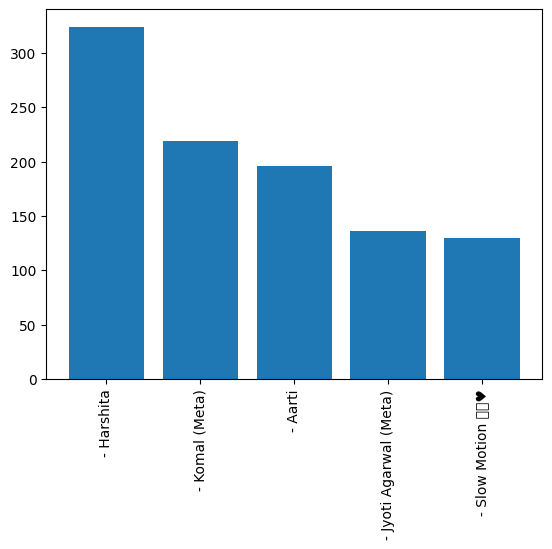

In [24]:
plt.bar(name ,count)
plt.xticks(rotation ='vertical')


In [25]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [26]:
f = open(r"C:\Users\artiy\Downloads\stop_hinglish.txt","r")
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [27]:
words =[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
            
   

In [28]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,47
1,😂,35
2,deleted,35
3,hn,26
4,yrr,25
5,class,22
6,🙂,21
7,jao,21
8,😂😂,20
9,sb,20


In [29]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [30]:
import emoji

In [31]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [32]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,159
1,🤣,46
2,🙂,34
3,😅,33
4,🥲,28
...,...,...
67,👠,1
68,↔,1
69,🙁,1
70,😉,1


In [33]:
df['month_num'] = df['date'].dt.month

In [34]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [35]:
timeline

,year,month_num,month,message
0,2023,1,January,42
1,2023,2,February,115
2,2023,3,March,205
3,2023,4,April,462
4,2023,5,May,25
5,2023,8,August,35
6,2023,9,September,61
7,2023,10,October,1
8,2023,12,December,56
9,2024,2,February,16


In [36]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [37]:
timeline['time'] = time

In [38]:
timeline

,year,month_num,month,message,time
0,2023,1,January,42,January-2023
1,2023,2,February,115,February-2023
2,2023,3,March,205,March-2023
3,2023,4,April,462,April-2023
4,2023,5,May,25,May-2023
5,2023,8,August,35,August-2023
6,2023,9,September,61,September-2023
7,2023,10,October,1,October-2023
8,2023,12,December,56,December-2023
9,2024,2,February,16,February-2024


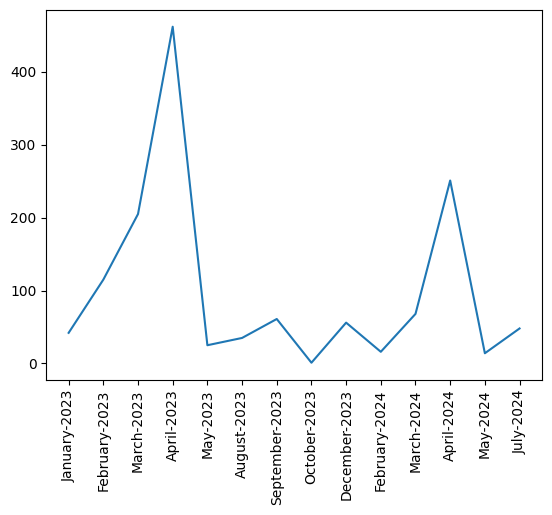

In [39]:
plt.plot(timeline['time'] , timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df['only_date'] = df['date'].dt.date

In [41]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

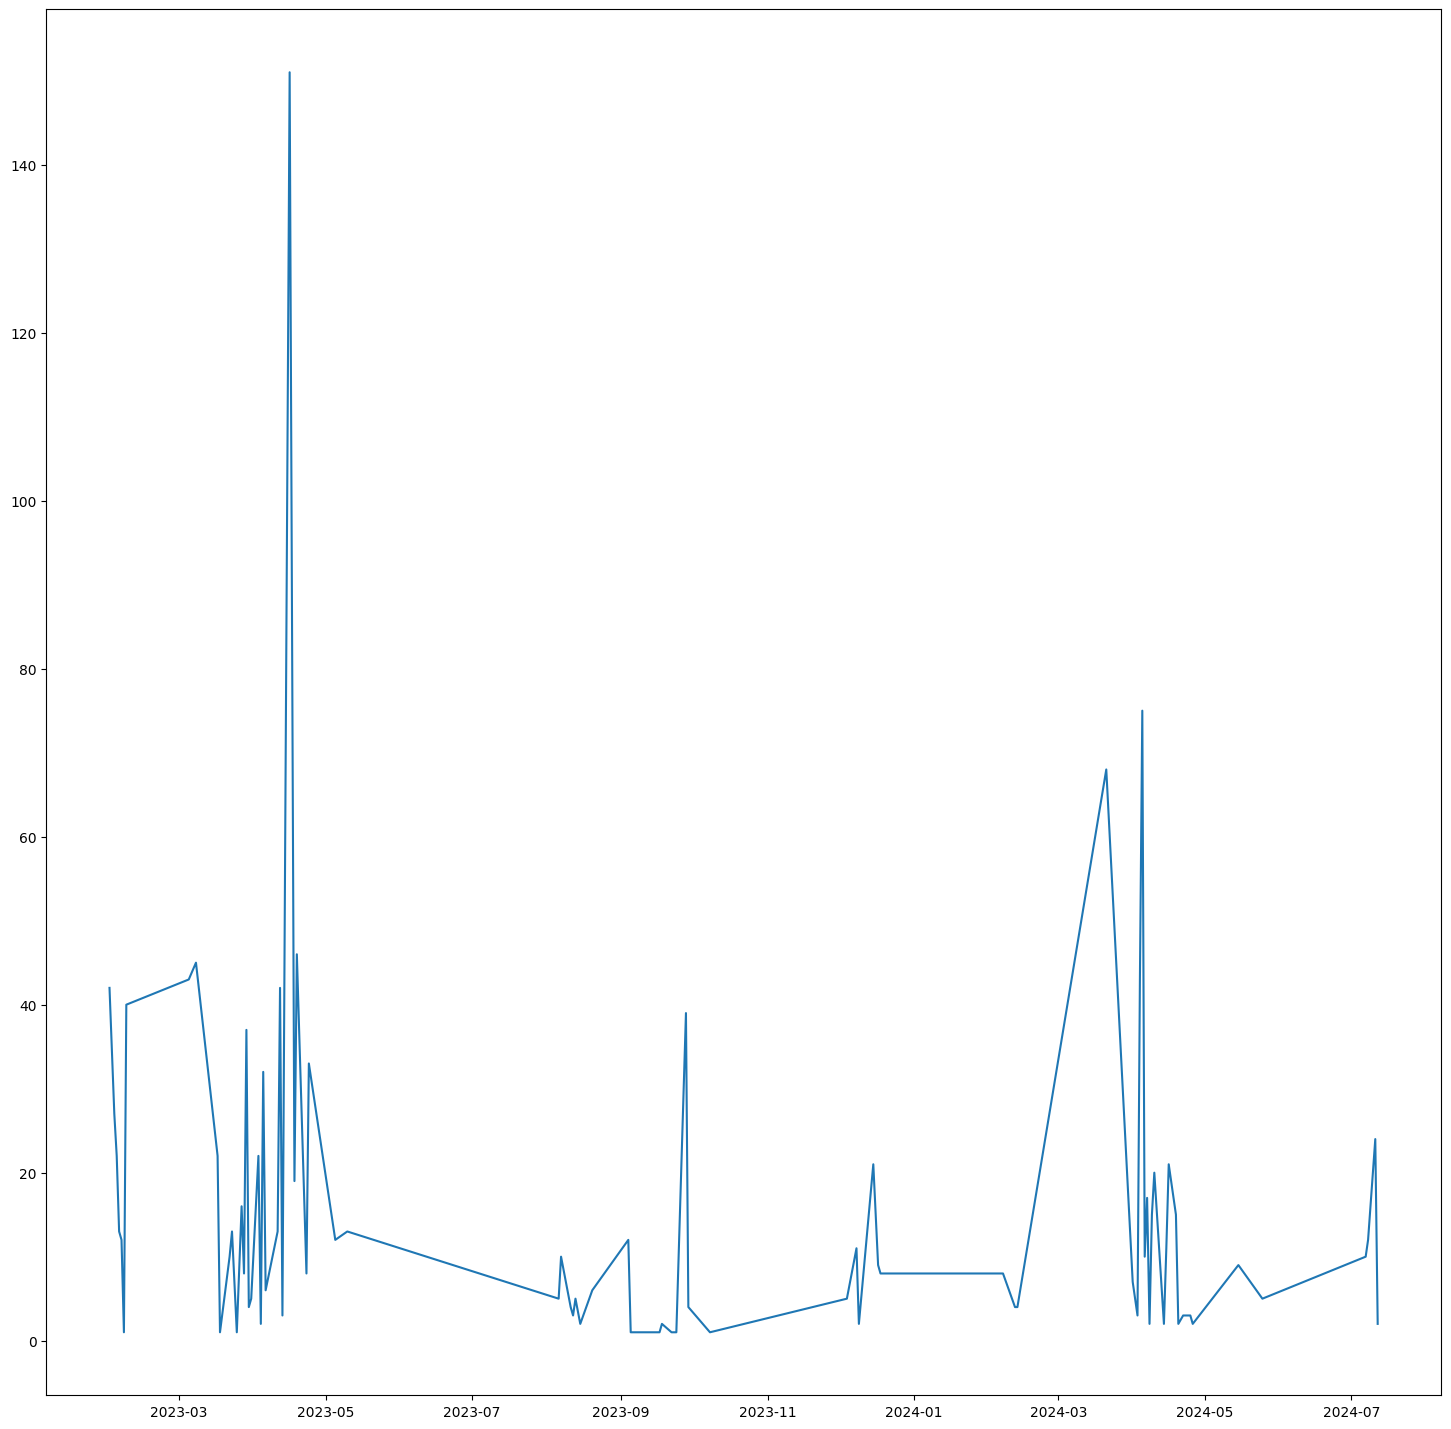

In [42]:
plt.figure(figsize=(18,18))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [43]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-01-31 21:30:00,group_notification,- Messages and calls are end-to-end encrypted....,2023,January,31,21,30,1,2023-01-31
1,2023-01-31 21:30:00,group_notification,"- Komal (Meta) created group ""RKG Sir ""\n",2023,January,31,21,30,1,2023-01-31
2,2023-01-31 21:30:00,group_notification,- Komal (Meta) added you\n,2023,January,31,21,30,1,2023-01-31
3,2023-01-31 21:31:00,group_notification,- Komal (Meta) changed this group's icon\n,2023,January,31,21,31,1,2023-01-31
4,2023-01-31 21:32:00,group_notification,- You're now an admin\n,2023,January,31,21,32,1,2023-01-31


In [44]:
df['day_name'] = df['date'].dt.day_name()

In [45]:
df['day_name'].value_counts()

day_name
Sunday       271
Wednesday    265
Monday       233
Thursday     230
Friday       196
Tuesday      167
Saturday      37
Name: count, dtype: int64

In [46]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour==23:
        period.append(str(hour) + " -" + str("00"))
    elif hour==0:
        period.append(str("00") + " -" + str(hour+1))
    else:
        period.append(str(hour) + " -" + str(hour+1))

In [47]:
df['period']= period

In [48]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
235,2023-03-08 18:25:00,- Aarti,Ab bol 😎\n,2023,March,8,18,25,3,2023-03-08,Wednesday,18 -19
81,2023-02-03 15:53:00,- Komal (Meta),Wyeeee\n,2023,February,3,15,53,2,2023-02-03,Friday,15 -16
464,2023-04-12 21:58:00,group_notification,- Rimjhim added Pooja Meta\n,2023,April,12,21,58,4,2023-04-12,Wednesday,21 -22
85,2023-02-03 16:58:00,- Komal (Meta),Kya hua\n,2023,February,3,16,58,2,2023-02-03,Friday,16 -17
1246,2024-04-09 18:37:00,- Harshita,Aane me time lgega na ab suddenly se time chan...,2024,April,9,18,37,4,2024-04-09,Tuesday,18 -19


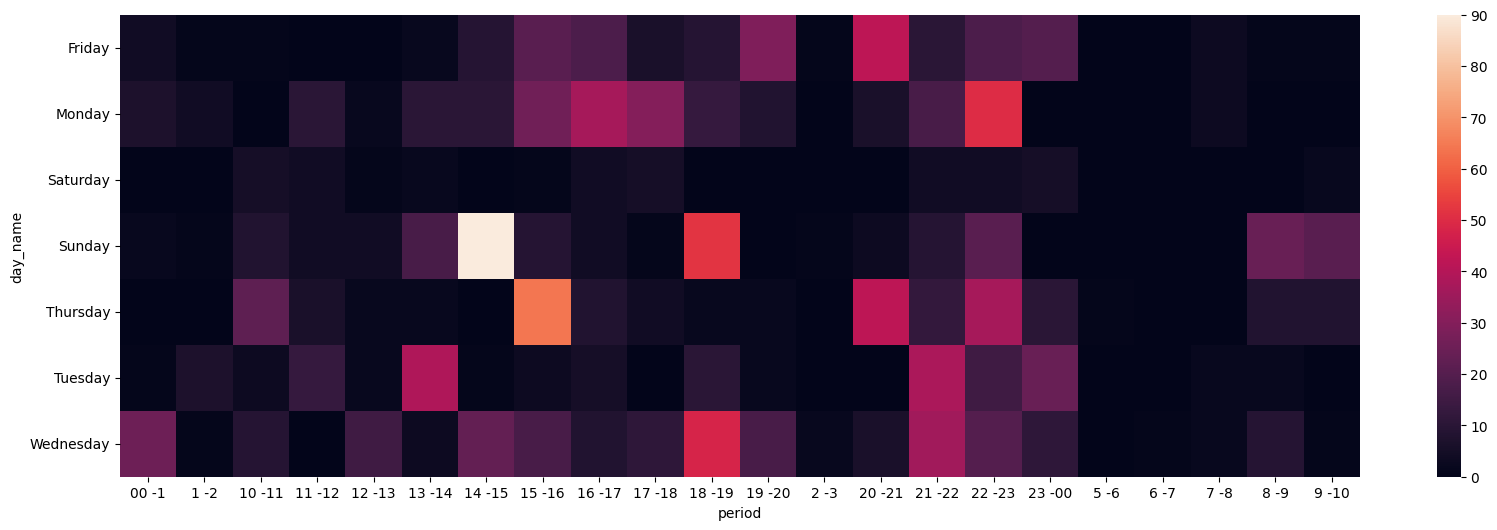

In [52]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index = 'day_name', columns = 'period' , values = 'message', aggfunc ='count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()
